In [98]:
#Habilitar intellisense
%config IPCompleter.greedy = True

In [99]:
%matplotlib inline

## Práctica

Empleando los datos sobre automóviles extraidos en un archivo csv via webscraping. Responda la siguientes preguntas:

- La asimetría de la variable "caballos_potencia" es negativa?  
No, es 1,03

- Entre estas variables: "caballos_potencia", "desplazamiento", "mpg"y  "aceleracion", cuáles tienen valores atípicos en ambos extremos?
Desplazamiento
- Entre estas variables: "caballos_potencia", "desplazamiento", "mpg"y  "aceleracion", cuáles no tienen valores atípicos?
mpg y aceleración
- Entre estas variables: "caballos_potencia", "desplazamiento", "mpg"y  "aceleracion", cuáles son las variable con mayor y menor asimetría?.
Caballos potencia es el mayor y aceleración el menor
- Entre estas variables: "caballos_potencia", "desplazamiento", "mpg"y  "aceleracion", muestre los valores atípicos de aquellas variables que los tengan en ambos extremos.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('datos_automoviles.csv')
print(data.head())

                      nombre  cilindros  peso  anio territorio  aceleracion  \
0  Chevrolet Chevelle Malibu          8  3504  1970        USA         12.0   
1          Buick Skylark 320          8  3693  1970        USA         11.5   
2         Plymouth Satellite          8  3436  1970        USA         11.0   
3              Amc Rebel Sst          8  3433  1970        USA         12.0   
4                Ford Torino          8  3449  1970        USA         10.5   

    mpg  caballos_potencia  desplazamiento  
0  18.0              130.0           307.0  
1  15.0              165.0           350.0  
2  18.0              150.0           318.0  
3  16.0              150.0           304.0  
4  17.0              140.0           302.0  


In [41]:
def asimetria(valor):
    return  data[valor].skew()

In [87]:
def genera_grafica_valorer_atipicos(campo):
    sns.kdeplot(data[campo], shade=True)
    plt.axvline( limite_derecho(campo,iqr(campo)) , 0, 1, color='b')
    plt.axvline( limite_izquierdo(campo,iqr(campo)) , 0, 1, color='b')
    

def limite_izquierdo(campo,iqr):
    return data.describe()[campo]['75%'] + 1.5 * IQR

def limite_derecho(campo,iqr):
    return data.describe()[campo]['25%'] - 1.5 * IQR

def iqr(campo):
    return  data.describe()[campo]['75%'] - data.describe()[campo]['25%']
    


In [85]:
def obtener_datos_simetria_limites(valor):
    genera_grafica_valorer_atipicos(valor)
    print('asimetria: ' + str(asimetria(valor)))
    print('iqr: ' + str(iqr(valor)))
    print('limite derecho: ' + str(limite_derecho(valor,iqr(valor))))
    print('limite izquierdo: ' + str(limite_izquierdo(valor,iqr(valor))))

asimetria: 1.034079427703104
iqr: 54.25
limite derecho: -5.625
limite izquierdo: 211.375


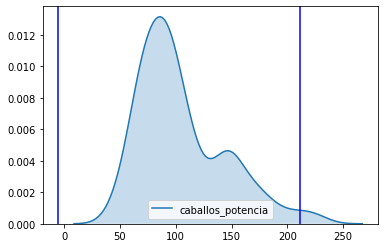

In [88]:
obtener_datos_simetria_limites('caballos_potencia')

asimetria: 0.6941299865999901
iqr: 197.0
limite derecho: 23.625
limite izquierdo: 383.375


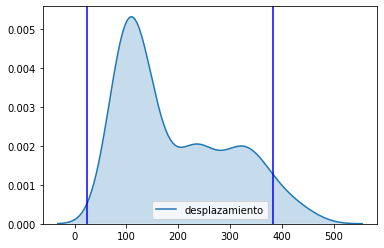

In [98]:
obtener_datos_simetria_limites('desplazamiento')


In [101]:

data.loc[data['desplazamiento'] <= 23.625] 
data.loc[data['desplazamiento'] >= 383.375] 



,nombre,cilindros,peso,anio,territorio,aceleracion,mpg,caballos_potencia,desplazamiento
5,Ford Galaxie 500,8,4341,1970,USA,10.0,15.0,198.0,429.0
6,Chevrolet Impala,8,4354,1970,USA,9.0,14.0,220.0,454.0
7,Plymouth Fury Iii,8,4312,1970,USA,8.5,14.0,215.0,440.0
8,Pontiac Catalina,8,4425,1970,USA,10.0,14.0,225.0,455.0
9,Amc Ambassador Dpl,8,3850,1970,USA,8.5,15.0,190.0,390.0
18,Chevrolet Monte Carlo,8,3761,1970,USA,9.5,15.0,150.0,400.0
19,Buick Estate Wagon (Sw),8,3086,1970,USA,10.0,14.0,225.0,455.0
46,Pontiac Catalina Brougham,8,4464,1971,USA,11.5,14.0,175.0,400.0
50,Ford Country Squire (Sw),8,4746,1971,USA,12.0,13.0,170.0,400.0
51,Pontiac Safari (Sw),8,5140,1971,USA,12.0,13.0,175.0,400.0


asimetria: 0.45706634399491936
iqr: 11.5
limite derecho: -63.875
limite izquierdo: 110.375


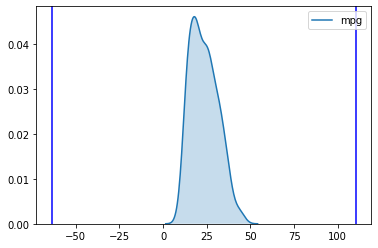

In [90]:
obtener_datos_simetria_limites('mpg')

asimetria: 0.23022375946556034
iqr: 3.474999999999998
limite derecho: -67.675
limite izquierdo: 98.55


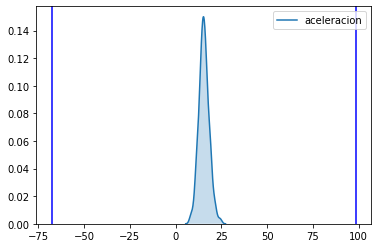

In [91]:
obtener_datos_simetria_limites('aceleracion')

- Hay alguna relacion entre el territorio y los caballos de potencia?
- Hay correlación entre los caballos de potencia y las millas por galón? 
- Si existe es un relación, ambas variables se mueven en la misma dirección?
- Compruebe la dirección de la relación con una visualización.

In [19]:
data

,nombre,cilindros,peso,anio,territorio,aceleracion,mpg,caballos_potencia,desplazamiento,territorio_num
0,Chevrolet Chevelle Malibu,8,3504,1970,USA,12.0,18.0,130.0,307.0,PAZ
1,Buick Skylark 320,8,3693,1970,USA,11.5,15.0,165.0,350.0,PAZ
2,Plymouth Satellite,8,3436,1970,USA,11.0,18.0,150.0,318.0,PAZ
3,Amc Rebel Sst,8,3433,1970,USA,12.0,16.0,150.0,304.0,PAZ
4,Ford Torino,8,3449,1970,USA,10.5,17.0,140.0,302.0,PAZ
...,...,...,...,...,...,...,...,...,...,...
401,Ford Mustang Gl,4,2790,1982,USA,15.6,27.0,86.0,140.0,PAZ
402,Vw Pickup,4,2130,1982,Europe,24.6,44.0,52.0,97.0,PAZ
403,Dodge Rampage,4,2295,1982,USA,11.6,32.0,84.0,135.0,PAZ
404,Ford Ranger,4,2625,1982,USA,18.6,28.0,79.0,120.0,PAZ


In [46]:

serie_paises = pd.Series(['USA','Europe','Japan'],index=['1','2','3'])

serie_paises[1]

'Europe'

In [44]:


def territorio_escrito_a_num(territorio):
    if territorio == serie_paises[1]:
        return 1
    elif territorio == serie_paises[2]:
        return 2
    elif territorio == serie_paises[3]:
        return 3
        
  


data['territorio_num'] = territorio_escrito_a_num(data['territorio'])
data

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

1       USA
2    Europe
3     Japan
dtype: object

In [10]:
data.corr()

,cilindros,peso,anio,aceleracion,mpg,caballos_potencia,desplazamiento
cilindros,1.000000,0.895220,-0.360762,-0.522452,-0.775396,0.844158,0.951787
peso,0.895220,1.000000,-0.315389,-0.430086,-0.831741,0.866586,0.932475
anio,-0.360762,-0.315389,1.000000,0.301992,0.579267,-0.424419,-0.381714
aceleracion,-0.522452,-0.430086,0.301992,1.000000,0.420289,-0.697124,-0.557984
mpg,-0.775396,-0.831741,0.579267,0.420289,1.000000,-0.778427,-0.804203
caballos_potencia,0.844158,0.866586,-0.424419,-0.697124,-0.778427,1.000000,0.898326
desplazamiento,0.951787,0.932475,-0.381714,-0.557984,-0.804203,0.898326,1.000000


Los caballos de potención tienen una relación con las millas por galón, debido el valor de correlación es 0.77 y es próximo a -1. Lo cual indica una relación inversa.

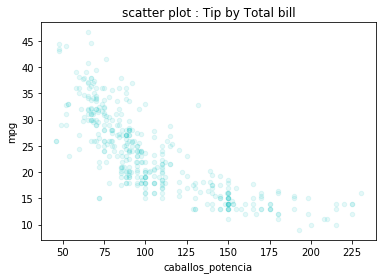

In [13]:

data.plot.scatter(x='caballos_potencia', y='mpg', color='c', title='scatter plot : Tip by Total bill', alpha=0.1)


No se mueven en la misma dirección

In [11]:
data.cov()

,cilindros,peso,anio,aceleracion,mpg,caballos_potencia,desplazamiento
cilindros,2.931491,1298.254662,-2.315526,-2.507662,-10.308911,56.184831,170.982829
peso,1298.254662,717416.332056,-1001.421626,-1021.220272,-5505.211745,28538.206404,82868.813665
anio,-2.315526,-1001.421626,14.053032,3.173656,16.741163,-61.462080,-150.138405
aceleracion,-2.507662,-1021.220272,3.173656,7.858821,9.058930,-75.801907,-164.122683
mpg,-10.308911,-5505.211745,16.741163,9.058930,61.089611,-233.857926,-655.402318
caballos_potencia,56.184831,28538.206404,-61.462080,-75.801907,-233.857926,1503.018239,3666.724846
desplazamiento,170.982829,82868.813665,-150.138405,-164.122683,-655.402318,3666.724846,11008.722272
